In [33]:
"""
Vaishali Talwar: A dashboard representing attitudes toward mental health issues, and treatment of those issues in the
tech. industry in Austin, TX. Kaggle Dataset: 
https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey?datasetId=311&sortBy=voteCount
"""
# Import all relevant libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


In [34]:
#Read file
MH = pd.read_csv(r"data\survey.csv", keep_default_na=True)




## DATA DESCRIPTION (OPTIONAL)

In [35]:
# Summary of each column

MH_Summary = (MH.describe(include = "all"))
# print(MH_Summary)
# print(MH.columns)




In [36]:
## DATA CLEANUP

# Taking the percent of values missing from all columns
round((MH.isna().sum()/MH.shape[0])*100,2)

Timestamp                     0.00
Age                           0.00
Gender                        0.00
Country                       0.00
state                        40.91
self_employed                 1.43
family_history                0.00
treatment                     0.00
work_interfere               20.97
no_employees                  0.00
remote_work                   0.00
tech_company                  0.00
benefits                      0.00
care_options                  0.00
wellness_program              0.00
seek_help                     0.00
anonymity                     0.00
leave                         0.00
mental_health_consequence     0.00
phys_health_consequence       0.00
coworkers                     0.00
supervisor                    0.00
mental_health_interview       0.00
phys_health_interview         0.00
mental_vs_physical            0.00
obs_consequence               0.00
comments                     86.97
dtype: float64

In [37]:
# Remove columns unnecessary to the analysis. [Explain?]
MH_columns_list = list(MH.columns)
MH_columns_list.remove('comments')
MH_columns_list.remove('Timestamp')
MH_no_employees_list = list(MH['no_employees'])

In [38]:
#Clean up and simplify age column

#Replacing strings with integers. 
MH["Age"] = MH["Age"].astype("int")
#Absolute Values
MH["Age"] = MH["Age"].abs()
#Replace unrealistic ages with not applicable
MH.loc[(MH["Age"] > 85) | (MH["Age"] < 16),"Age"] = None



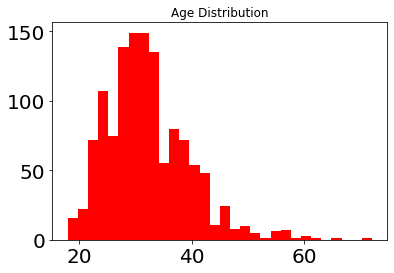

In [39]:
# Visualize the simplified age column
fig, ax = plt.subplots()
ax.hist(MH["Age"], 30, color = 'red', lw = 10)
plt.title ("Age Distribution")
plt.show()

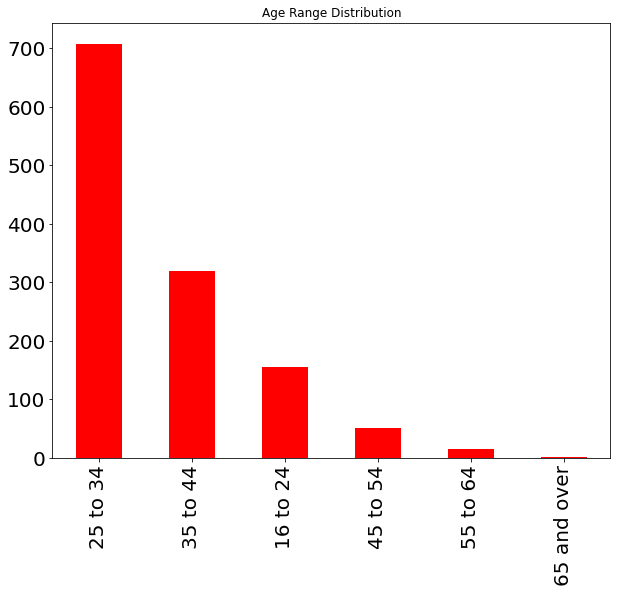

In [40]:
# Further simplification of age columns by grouping ages into age ranges. 
MH_NewAge = MH["Age"].copy()
MH_NewAge[(MH["Age"] >= 16) & (MH["Age"] < 25)] = "16 to 24"
MH_NewAge[(MH["Age"] >= 25) & (MH["Age"] < 35)] = "25 to 34"
MH_NewAge[(MH["Age"] >= 35) & (MH["Age"] < 45)] = "35 to 44"
MH_NewAge[(MH["Age"] >= 45) & (MH["Age"] < 55)] = "45 to 54"
MH_NewAge[(MH["Age"] >= 55) & (MH["Age"] < 65)] = "55 to 64"
MH_NewAge[(MH["Age"] >= 65)] = "65 and over"

# Plot
MH_NewAge.value_counts()
plt.figure(figsize = (10,8))
plt.title("Age Range Distribution")
MH_NewAge.value_counts().plot.bar(color = 'red')
plt.show()

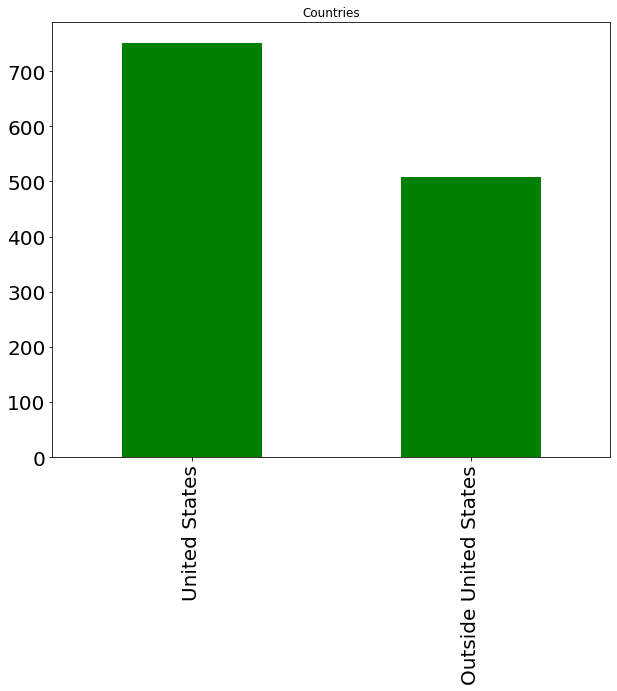

In [41]:
#Simplify Country column 

#Change all foreign countries into one group
MH_NewCountry = MH["Country"].copy()
MH_NewCountry[(MH["Country"] != "United States")] = "Outside United States"

#Plot Bar Plot
MH_NewCountry.value_counts()
plt.figure(figsize = (10,8))
plt.title('Countries')
MH_NewCountry.value_counts().plot.bar(color = 'green')
plt.show()

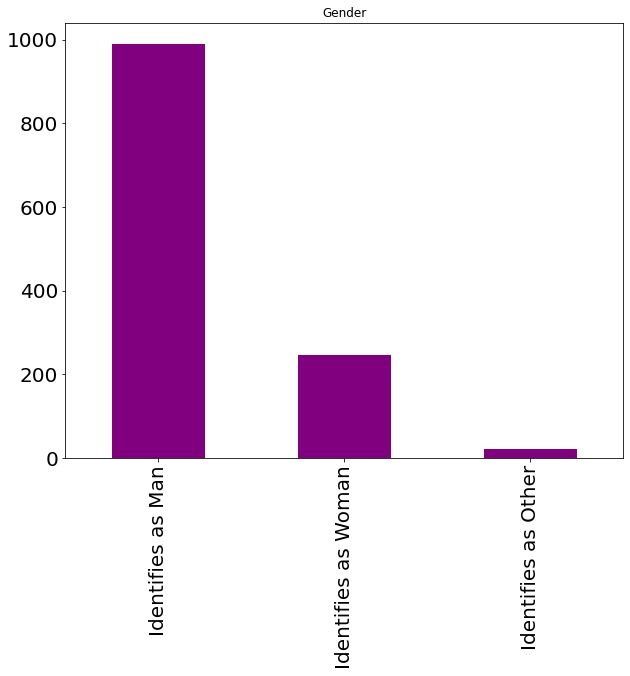

In [42]:
#Simplify gender column

# Make copy of gender column
MH_NewGender = MH["Gender"].copy()
# print(MH["Gender"].unique())

# List all unique values in the gender column and manually simplify the list [Go over]
male={'M', 'Male', 'male', 'm', 'maile', 'Cis Male', 'Mal', 'Male (CIS)', 'Make', 'Male ','Man','msle', 'Mail', 'cis male',  'Malr',  'Cis Man'}
male2={'male', 'm', 'maile', 'mal', 'male (cis)', 'make', 'man','msle', 'mail', 'cis male',  'malr',  'cis man'}

female={'Female', 'female', 'Cis Female', 'F', 'Woman', 'f', 'Femake', 'woman', 'Female ','cis-female/femme','Female (cis)', 'femail'}
female2={'female', 'cis female', 'f', 'femake', 'woman', 'cis-female/femme','female (cis)', 'femail'}

for i in range(len(MH["Gender"])):
    gender = MH["Gender"][i].lower().strip() 
    if (gender in male2):
        MH_NewGender[i] = "Identifies as Man"
    elif gender in female2: 
        MH_NewGender[i] = "Identifies as Woman"
    else:
        MH_NewGender[i] = "Identifies as Other"
        

plt.figure(figsize = (10,8))
plt.title('Gender')
MH_NewGender.value_counts().plot.bar(color = 'purple')
plt.show()

In [43]:
#Append new columns to dataframe

MH["Grouped Ages"]=MH_NewAge
MH["Grouped Genders"]=MH_NewGender
MH ["Grouped Countries"]=MH_NewCountry


In [44]:
# Print new columns list
print(MH_columns_list)

['Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence']


## DATA VISUALIZATION

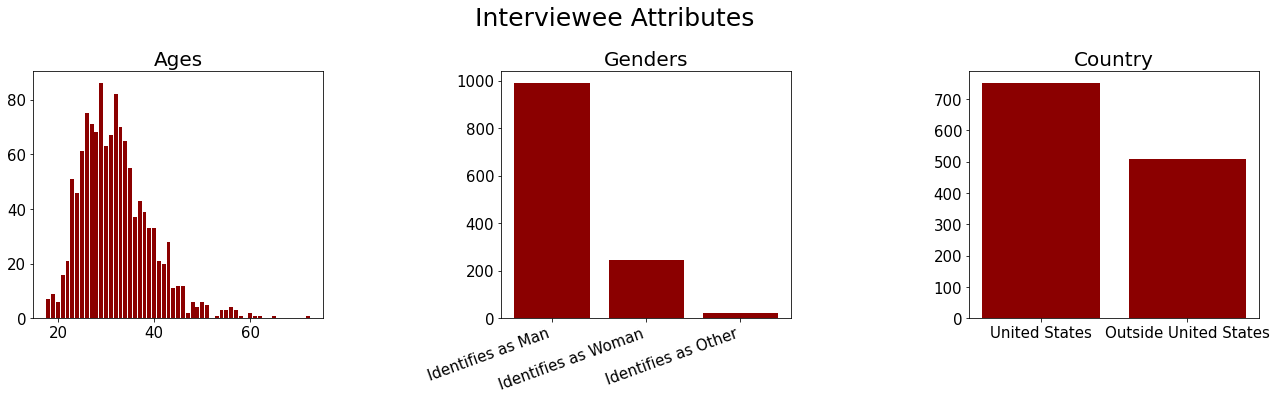

In [45]:
# Plot the new columns and other relevant columns to form a comprehensive dashboard.
import matplotlib
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)


#INTERVIEWEE ATTRIBUTES
MH_Interviewee_Attr = {}
MH_Interviewee_Attr_Titles = ['Ages', 'Genders', 'Country']
MH_Interviewee_Attr_List = [MH["Age"].value_counts(), MH["Grouped Genders"].value_counts(), MH["Grouped Countries"].value_counts()]


fig1,axs = plt.subplots(1, 3)
fig1.tight_layout(h_pad=1.25)
fig1.set_size_inches(20, 5)


for i in range(3):
    if MH_Interviewee_Attr_Titles[i] == 'Age':
        axs[i].hist(MH["Age"].values, 30, color = 'red', lw=10)
        axs[i].set_title(MH_Interviewee_Attr_Titles[i], fontsize = 20)
    else:
        axs[i].bar((MH_Interviewee_Attr_List[i].index), (MH_Interviewee_Attr_List[i].values), color = 'darkred')
        axs[i].set_title(MH_Interviewee_Attr_Titles[i], fontsize = 20)

plt.setp(axs[1].get_xticklabels(), rotation=20, ha ='right')
fig1.suptitle('Interviewee Attributes', fontsize = 25)
plt.subplots_adjust(top=0.80)

plt.show()

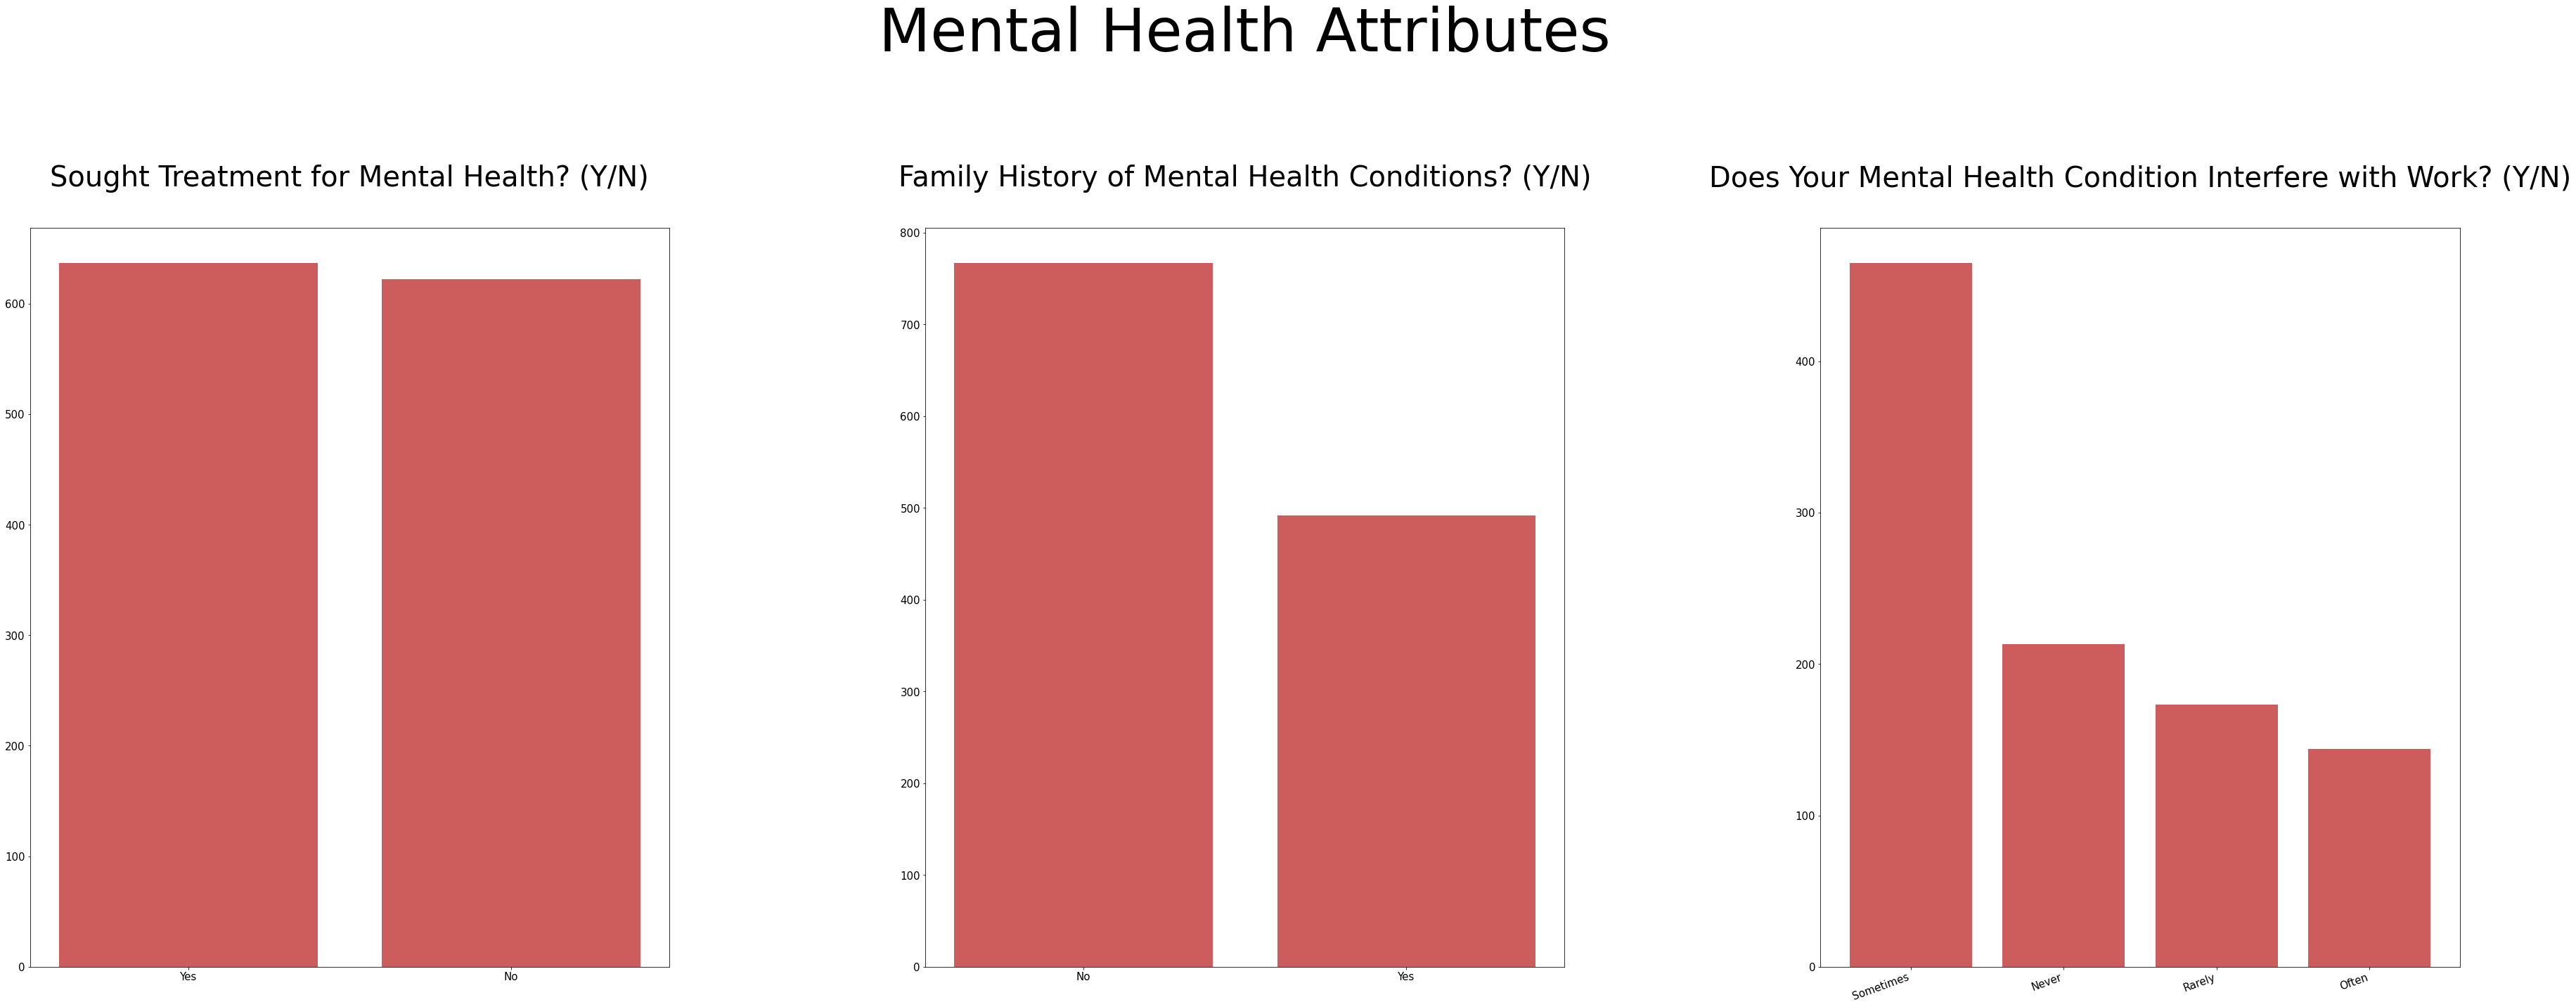

In [46]:
#MENTAL HEALTH ATTRIBUTES:
MH_MH_Attr_Titles = ["Sought Treatment for Mental Health? (Y/N)","Family History of Mental Health Conditions? (Y/N)", "Does Your Mental Health Condition Interfere with Work? (Y/N)"]
MH_MH_Attr_List = [MH["treatment"].value_counts(), MH["family_history"].value_counts(), MH["work_interfere"].value_counts()]

fig2,axs = plt.subplots(1, 3)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, 
                    hspace=0.5)
# fig.tight_layout(h_pad=1.25)
fig2.set_size_inches(60, 20)



for i in range(3):
        axs[i].bar((MH_MH_Attr_List[i].index), (MH_MH_Attr_List[i].values), color = 'indianred')
        axs[i].set_title(MH_MH_Attr_Titles[i], fontsize = 40, y = 1.05)

plt.setp(axs[2].get_xticklabels(), rotation=20, ha ='right')
fig2.suptitle('Mental Health Attributes', fontsize = 85, y = 1.05 )
plt.subplots_adjust(top=0.83)
plt.show()

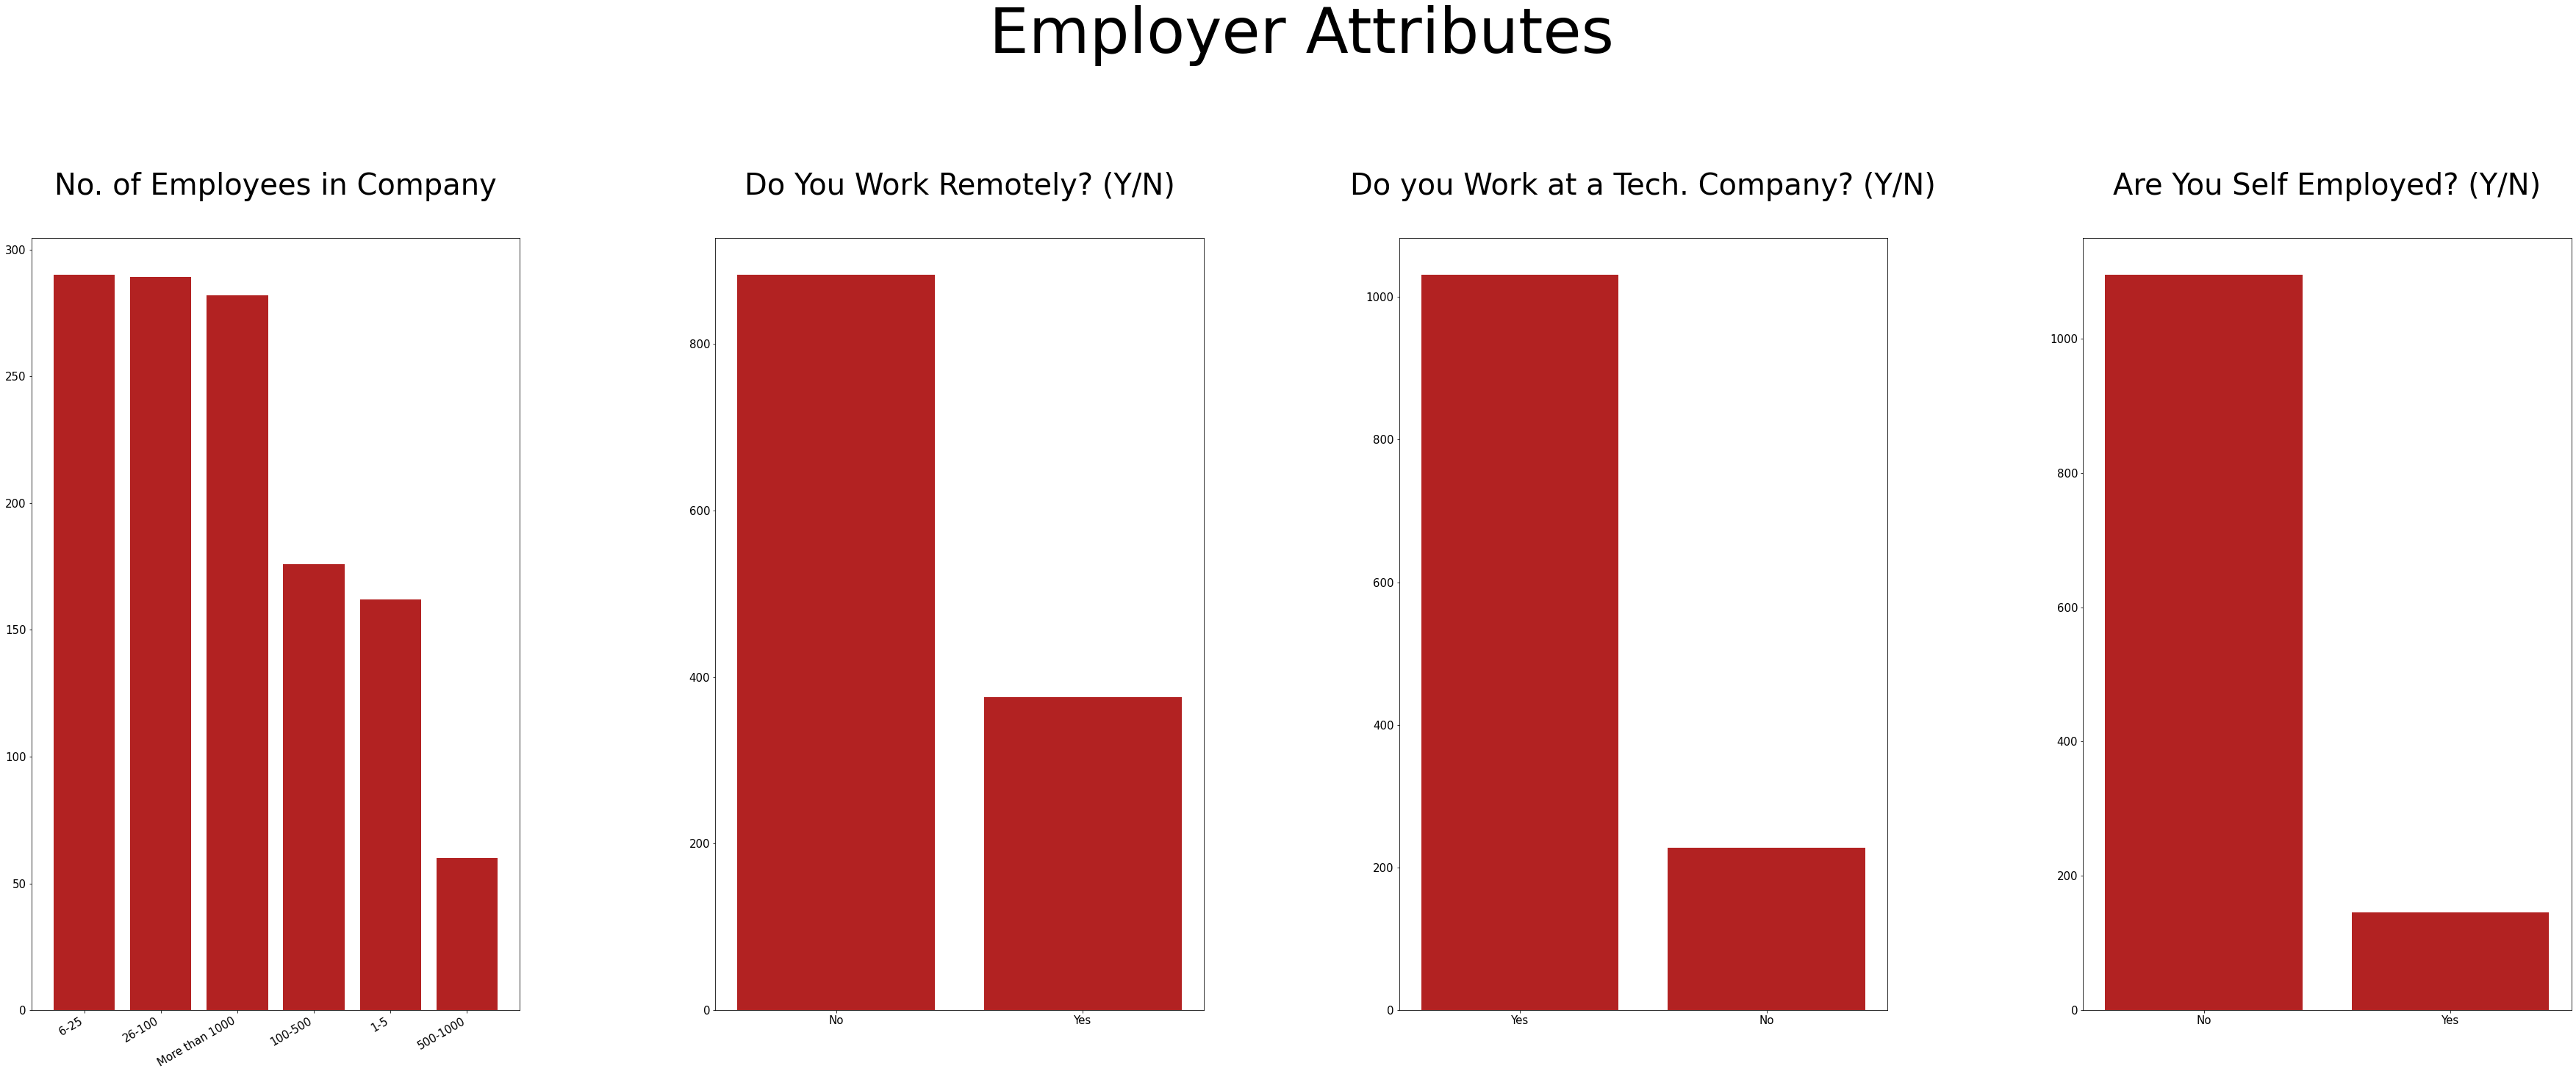

In [47]:
#EMPLOYER ATTRIBUTES
MH_Employer_Attr_Titles = ["No. of Employees in Company", "Do You Work Remotely? (Y/N)", "Do you Work at a Tech. Company? (Y/N)", "Are You Self Employed? (Y/N)"]
MH_Employer_Attr_List = [MH["no_employees"].value_counts(), MH["remote_work"].value_counts(), MH["tech_company"].value_counts(), MH["self_employed"].value_counts()]


fig3,axs = plt.subplots(1, 4)
# fig2.tight_layout(h_pad=1.05)
fig3.set_size_inches(60, 20)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, 
                    hspace=0.5)
# plt.subplots_adjust(top=0.80)

for i in range(4):
        axs[i].bar((MH_Employer_Attr_List[i].index), (MH_Employer_Attr_List[i].values), color = 'firebrick')
        axs[i].set_title(MH_Employer_Attr_Titles[i], fontsize = 40, y = 1.05)

plt.setp(axs[0].get_xticklabels(), rotation=30, ha ='right')
fig3.suptitle('Employer Attributes', fontsize = 85, y=1.05)
plt.subplots_adjust(top=0.83)
plt.show()

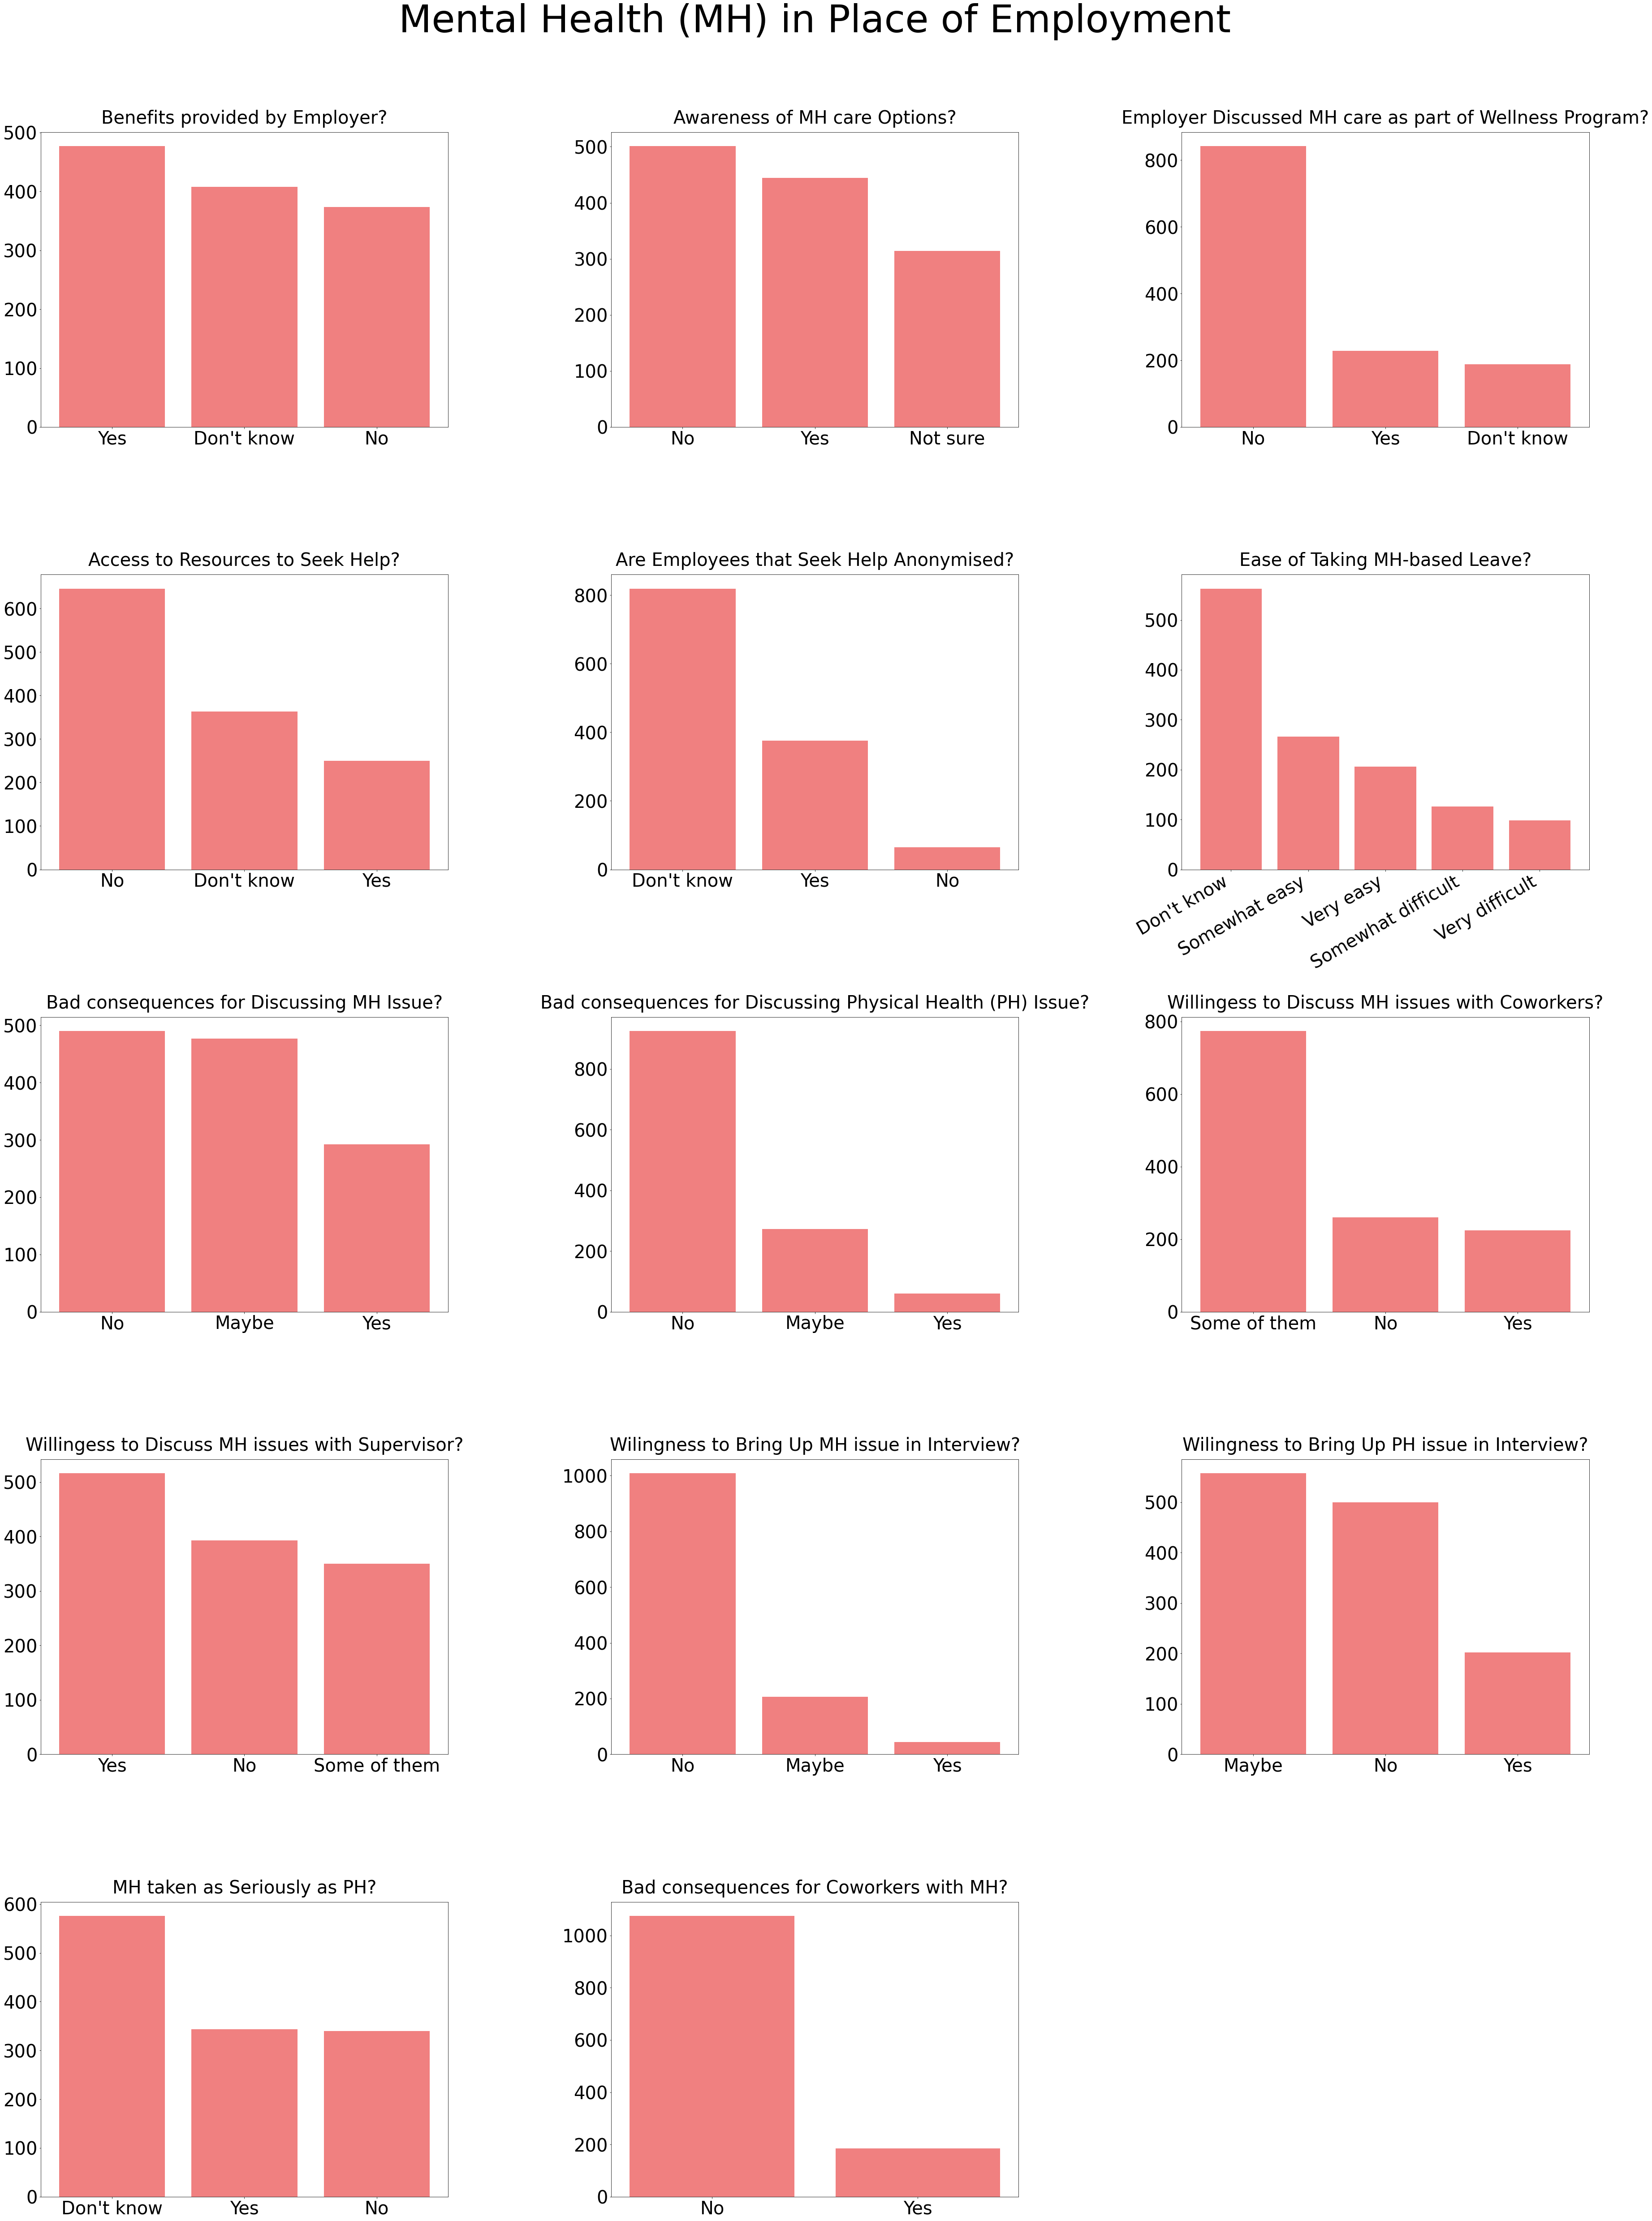

In [48]:
#MENTAL HEALTH IN PLACE OF EMPLOYEMENT
matplotlib.rc('xtick', labelsize=40)
matplotlib.rc('ytick', labelsize=40)
MH_MH_EAttrTitles = [["Benefits provided by Employer?", "Awareness of MH care Options?", "Employer Discussed MH care as part of Wellness Program?"],
                    ["Access to Resources to Seek Help?", "Are Employees that Seek Help Anonymised?", "Ease of Taking MH-based Leave?"],
                    ["Bad consequences for Discussing MH Issue?", "Bad consequences for Discussing Physical Health (PH) Issue?", "Willingess to Discuss MH issues with Coworkers?"],
                    ["Willingess to Discuss MH issues with Supervisor?", "Wilingness to Bring Up MH issue in Interview?", "Wilingness to Bring Up PH issue in Interview?"],
                    ["MH taken as Seriously as PH?", "Bad consequences for Coworkers with MH?"]]

MH_MH_EAttr_List = [[MH["benefits"].value_counts(), MH["care_options"].value_counts(), MH["wellness_program"].value_counts()],
                   [MH["seek_help"].value_counts(), MH["anonymity"].value_counts(), MH["leave"].value_counts()],
                   [MH["mental_health_consequence"].value_counts(), MH["phys_health_consequence"].value_counts(), MH["coworkers"].value_counts()],
                   [MH["supervisor"].value_counts(), MH["mental_health_interview"].value_counts(), MH["phys_health_interview"].value_counts()],
                   [MH["mental_vs_physical"].value_counts(), MH["obs_consequence"].value_counts()]]


fig4,axs = plt.subplots(5, 3)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, 
                    hspace=0.5)

fig4.set_size_inches(60, 80)


for i in range(5):
    for j in range(3):
        if i ==4 and j ==2:
            axs[i,j].set_visible(False)
            continue
        else:
            axs[i,j].bar((MH_MH_EAttr_List[i][j].index), (MH_MH_EAttr_List[i][j].values), color = 'lightcoral')
            axs[i,j].set_title(MH_MH_EAttrTitles[i][j], fontsize = 40, y = 1.02)

plt.setp(axs[1,2].get_xticklabels(), rotation=30, ha ='right')
fig4.suptitle('Mental Health (MH) in Place of Employment', fontsize = 85, y=0.95)
plt.show()

## DATA ANALYSIS

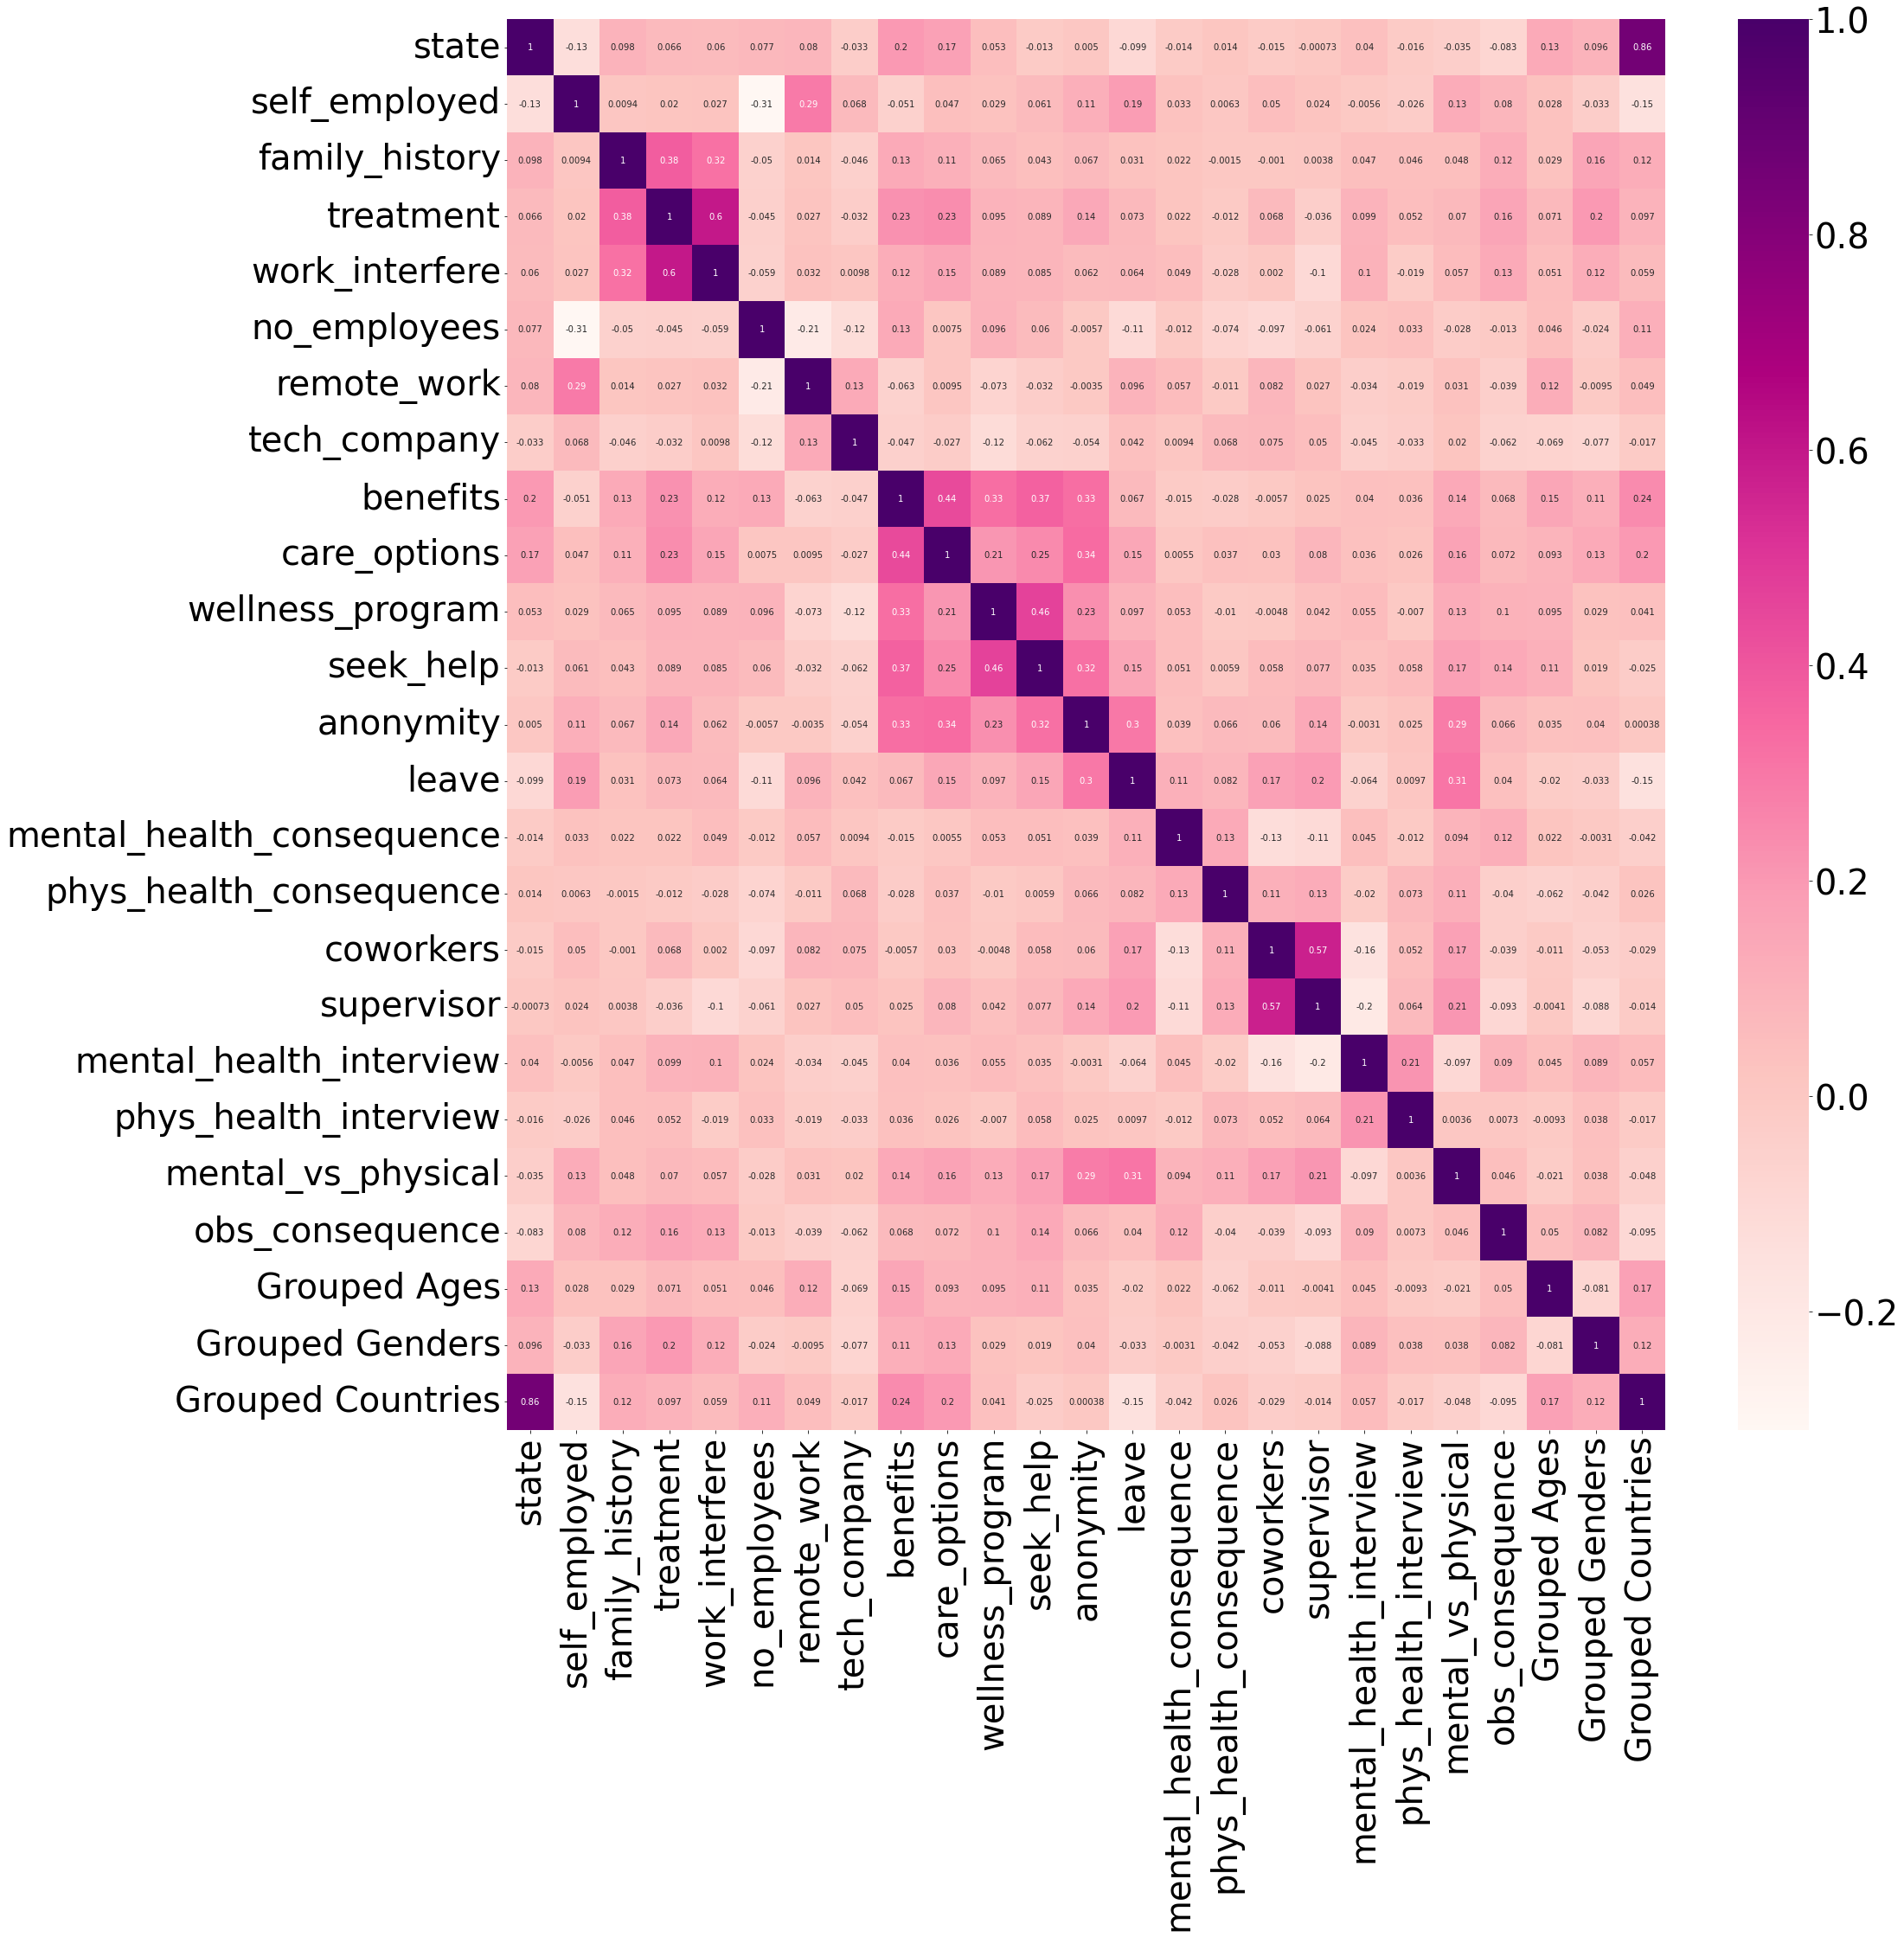

In [49]:
# Looking at a correlation plot to see if any two attributes jump out at us as being highly correlated.
 #Correlation Plot

import seaborn as sns
MH_Corr = MH
MH_Corr = MH_Corr.drop(columns =["Timestamp", "comments", "Age", "Gender", "Country"])
# MH_Corr.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1)
# MH_Corr_treatment = MH_Corr.loc[MH_Corr["treatment"] == "Yes"]
# MH_Corr_USA = MH_Corr.loc[MH_Corr["Grouped Countries"] == "United States"]
# print(MH_Corr_USA.head())

plt.figure(figsize=(30,30))
cor = MH_Corr.apply(lambda x : pd.factorize(x,sort=True)[0]).corr(method='spearman', min_periods=1)
# cor_USA = MH_Corr_treatment.apply(lambda x : pd.factorize(x,sort=True)[0]).corr(method='spearman', min_periods=1)
sns.heatmap(cor, annot=True, cmap=plt.cm.RdPu)

plt.show()

In [50]:
# VISUALIZING THE ATTRIBUTES OF AN EMPLOYEE SEEKING MENTAL HEALTH TREATMENT
# We selected this because employees are equally likely to seek vs. not seek treatment and 
# we wanted to explore the attributes of both sets of employees.

In [51]:
# Defining those seeking treatment vs. those who do not.
seek_treatment = MH[MH.treatment == 'Yes'].drop(['treatment', "Timestamp", "Age", "Gender", "Country", "comments", "state"], axis=1)
dont_seek_treatment = MH[MH.treatment == 'No'].drop(['treatment', "Timestamp", "Age", "Gender", "Country", "comments", "state"], axis=1)
# print((seek_treatment.columns))

In [52]:
# Visualization:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#fig,_ = plt.subplots(5, 3, constrained_layout = True)

buttons = []
i = 0
vis = [False] * 23
titles = dict()
titles = {'self_employed': "Are You Self Employed? (Y/N)", 
          'family_history': "Family History of Mental Health Conditions? (Y/N)", 
#           'treatment': "Sought Treatment for Mental Health? (Y/N)",
          'work_interfere': "Does Your Mental Health Condition Interfere with Work? (Y/N)",
          'no_employees': "No. of Employees", 
          'remote_work':  "Do You Work Remotely? (Y/N)",
          'tech_company': "Do you Work at a Tech. Company? (Y/N)",
          'benefits': "Benefits provided by Employer?",  
          'care_options': "Awareness of Mental Healthcare Options?",
          'wellness_program': "Employer Discussed Mental Healthcare as part of Wellness Program?",
          'seek_help': "Access to Resources to Seek Help?",
          'anonymity': "Are Employees that Seek Help Anonymised?",
          'leave': "Ease of Taking Mental Health-based Leave?",
          'mental_health_consequence': "Bad consequences for Discussing Mental Health Issue?",  
          'phys_health_consequence': "Bad consequences for Discussing Physical Health Issue?",
          'coworkers': "Willingess to Discuss Mental Health issues with Coworkers?",
          'supervisor': "Willingess to Discuss Mental Health issues with Supervisor?", 
          'mental_health_interview': "Wilingness to Bring Up Mental Health issue in Interview?",
          'phys_health_interview': "Wilingness to Bring Up Physical Health issue in Interview?",
          'mental_vs_physical': "Mental Health taken as seriously as Physical Health?",  
          'obs_consequence': "Bad consequences for Coworkers with Mental Health?",
          'Grouped Ages': 'Ages',  
          'Grouped Genders': 'Genders', 
          'Grouped Countries': 'Country'}


for value in titles.values():
#     if value is not 'Select Question':
    vis[i] = True
    buttons.append({'label' : value,
             'method' : 'update',
             'args'   : [{'visible' : vis}]})
    i+=1
    vis = [False] * 23
# print(buttons)

fig = make_subplots(rows=1, cols=2,
                   specs=[[{'type':'domain'}, {'type':'domain'}]])

for col in dont_seek_treatment.columns:
    fig.add_trace(go.Pie(
             values = dont_seek_treatment[col].value_counts(),
             labels = dont_seek_treatment[col].value_counts().index,
             title = dict(text = 'Respondents Who Do Not Seek Treatment',
                          font = dict(size=10, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,2)

# fig.add_trace(fig.data[-1])

for col in seek_treatment.columns:
    fig.add_trace(go.Pie(
             values = seek_treatment[col].value_counts(),
             labels = seek_treatment[col].value_counts().index,
             title = dict(text = 'Respondents Who Seek Treatment',
                          font = dict(size=10, family = 'monospace'),
                          ),
             hole = 0.5,
             hoverinfo='label+percent',),1,1)

# fig.add_trace(fig.data[-1])

fig.update_traces(row=1, col=2, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette('pink').as_hex(),
                              line=dict(color='#000000', width=1)))

fig.update_traces(row=1, col=1, hoverinfo='label+percent',
                  textinfo='label+percent',
                  textfont_size=12,
                  opacity = 0.8,
                  showlegend = False,
                  marker = dict(colors = sns.color_palette("Blues").as_hex(),
                              line=dict(color='#000000', width=1)))
              

fig.update_layout(margin=dict(t=0, b=0, l=0, r=0),
                  font_family   = 'monospace',
                  updatemenus = [dict(
                        type = 'dropdown',
                        x = 0.60,
                        y = 1,
                        showactive = True,
                        active = 0,
                        buttons = buttons)],
                   annotations=[
                             dict(text = "<b>Choose<b> Column<b>: ",
                                  font = dict(size = 14),
                             showarrow=False,
                             x = 0.0, y = 1.0, yref = "paper", align = "center")])

for i in range(46):
     fig.data[i].visible = False
fig.data[23].visible = True
fig.data[0].visible = True

fig.show()

In [53]:
# SIDEBAR: Exploring the demographics that work remotely. 

In [54]:
#Develop a Filter based on whether an employee works remotely or not. 

MH_remote_yes = MH.loc[MH.remote_work == "Yes" ]
MH_remote_no = MH.loc[MH.remote_work == "No"]

# print(MH_remote_yes.head())
# print(MH_remote_no.head())

import matplotlib
matplotlib.rc('xtick', labelsize=15)
matplotlib.rc('ytick', labelsize=15)




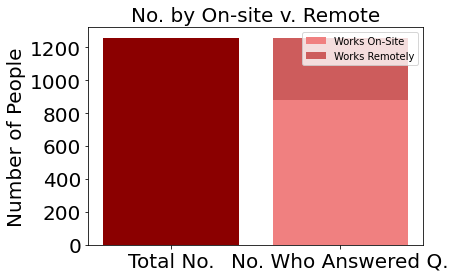

In [55]:
# Analysis of filter based on remote work.
# Ratio of Total:Remote:NonRemote - ensuring 
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
MH_remote_sum = MH['remote_work'].value_counts()
# print(MH_remote_sum)
MH_remote_yes_sum = MH_remote_sum["Yes"] #type = numpy.int64
MH_remote_no_sum = MH_remote_sum["No"]
MH_total = MH.shape[0]
# print(MH_total)
MH_remote_x = [MH_total, MH_remote_no_sum]
width = 0.25
labels_remote =  ['Total No.', 'No. Who Answered Q']
labels_remote1 = ['Ratios']

figR, axR = plt.subplots()
axR.bar('Total No.', MH_total, color = 'darkred')
axR.bar('No. Who Answered Q.', MH_remote_no_sum, label = "Works On-Site", color = 'lightcoral')
axR.bar('No. Who Answered Q.', MH_remote_yes_sum, bottom = MH_remote_no_sum, label = 'Works Remotely', color = 'indianred')

axR.set_yticks(np.arange(0, 1400, 200))
axR.set_ylabel('Number of People', fontsize = 20)
axR.set_title('No. by On-site v. Remote', fontsize = 20)
axR.legend(loc='upper right')

plt.show()

# Y/N ratios for self employed (stacked graphs + ratios)
# Y:N:DK ratios for Benefits (stacked graphs?)
# Y:N ratios for employer discussions re. MH being part of a wellness program. 
# N:Maybe ratio for consequences of MH discussion
# Y:N ratios for MH as seriously as PH

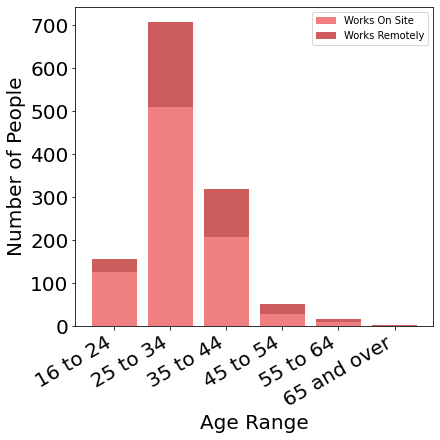

In [56]:
# AGE DISTRIBUTION OF THOSE WHO WORK REMOTELY VS. THOSE WHO WORK ON-SITE
a1 = MH_remote_yes["Grouped Ages"].value_counts()
a1 = a1.sort_index()
a2 = MH_remote_no["Grouped Ages"].value_counts() #on-site
a2 = a2.sort_index()


# Bar plot
a4 = MH_remote_no["Grouped Ages"].value_counts() #on-site
a4 = a4.sort_index()
a3 = pd.Series([0], index = ["65 and over"])
a4 = a4.append(a3)

figRA, axRA = plt.subplots(constrained_layout = True)
figRA.set_size_inches(6, 6)
axRA.bar(a4.index, a4.values, label = "Works On Site", color = "lightcoral")
axRA.bar(a1.index, a1.values, bottom = a4.values, label = "Works Remotely", color = "indianred")
plt.setp(axRA.get_xticklabels(), rotation=30, ha ='right')
axRA.set_yticks(np.arange(0, 800, 100))
axRA.set_ylabel('Number of People', fontsize = 20)
axRA.set_xlabel('Age Range', fontsize = 20)
# axRA.set_title('No. by On-site v. Remote', fontsize = 20)
axRA.legend(loc='upper right')
plt.show()



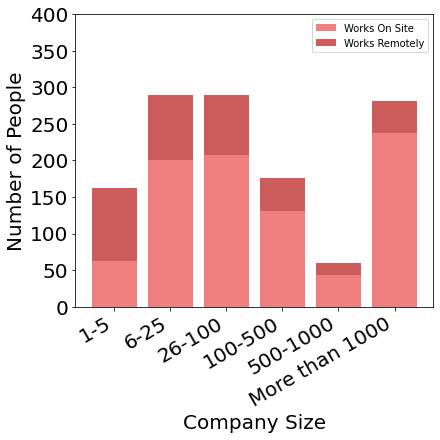

In [57]:
# DISTRIBUTION OF COMPANY SIZE (NUMBER OF EMPLOYEES) BY REMOTE VS. NON REMOTE WORK
b1 = MH_remote_yes["no_employees"].value_counts()
b1 = b1.to_frame()
b1 = b1.reset_index()
b1 = b1.rename(columns = {'index': 'Company Size'})
i = range(len(b1['Company Size']))
NC1 = []

for a in b1["Company Size"][i]:
    for j in range(len(a)):
        if a[j+1] == '-':
            b = int(a[j])
            NC1.append(b)
            break
        elif a[j+2] == '-':
            b = int(a[j]+ a[j+1])
            NC1.append(b)
            break
        elif a[j+3] == '-':
            b = int(a[j] + a[j+1] + a[j+2])
            NC1.append(b)
            break
        elif a[j] == "M":
            b = 250000
            NC1.append(b)
            break
b1["Numeric Conversion"] = NC1
b1 = b1.sort_values(by=['Numeric Conversion'])
b1 = b1.drop(columns=['Numeric Conversion'])
b1 = b1.set_index("Company Size")
b1 = b1.squeeze(axis = 1)


b2 = MH_remote_no["no_employees"].value_counts() #on-site
b2 = b2.to_frame()
b2 = b2.reset_index()
b2 = b2.rename(columns = {'index': 'Company Size'})
i = range(len(b2['Company Size']))
NC = []

for a in b2["Company Size"][i]:
    for j in range(len(a)):
        if a[j+1] == '-':
            b = int(a[j])
            NC.append(b)
            break
        elif a[j+2] == '-':
            b = int(a[j]+ a[j+1])
            NC.append(b)
            break
        elif a[j+3] == '-':
            b = int(a[j] + a[j+1] + a[j+2])
            NC.append(b)
            break
        elif a[j] == "M":
            b = 250000
            NC.append(b)
            break
b2["Numeric Conversion"] = NC
b2 = b2.sort_values(by=['Numeric Conversion'])
b2 = b2.drop(columns=['Numeric Conversion'])
b2 = b2.set_index("Company Size")
b2 = b2.squeeze(axis = 1)


figRN, axRN = plt.subplots(constrained_layout = True)
figRN.set_size_inches(6, 6)
axRN.bar(b2.index, b2.values, label = "Works On Site", color = "lightcoral")
axRN.bar(b1.index, b1.values, bottom = b2.values, label = "Works Remotely", color = "indianred")
plt.setp(axRN.get_xticklabels(), rotation=30, ha ='right')
axRN.set_yticks(np.arange(0, 450, 50))
axRN.set_ylabel('Number of People', fontsize = 20)
axRN.set_xlabel('Company Size', fontsize = 20)
# axRN.set_title('No. by On-site v. Remote', fontsize = 20)
axRN.legend(loc='upper right')
plt.show()

